In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import seaborn as sns
import gc
import random as rd
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from datetime import datetime

In [ ]:
customers_df=pd.read_csv('customers_subset.csv')
transactions_df=pd.read_csv('transactions_train_subset.csv')
articles_df=pd.read_csv('articles_subset.csv')

In [ ]:
customer_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [ ]:
customer_subset_df=customer_df.sample(frac=0.025)

In [ ]:
customer_subset_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
166374,1eff46f4dcf56773ce37fb0be3b1d74f516c6df6474318...,1.0,1.0,ACTIVE,Regularly,19.0,62d233fbd67594a3b41fe310b315111498cdd1ed9bd78c...
15815,02f1b41ba688aea08bde7ce3e2c36df87b8c6f8d0d5f6f...,1.0,1.0,ACTIVE,Regularly,34.0,023dab68ffccadf30c12e13abf467ee74e14a33abfb448...
1308101,f41abbc77882baacdde7f6d953ff795b10d71af561630f...,NaN,NaN,ACTIVE,NONE,49.0,71f5b4b6cad8896d7784f86bb481b0f706a42c1f09056f...
1015863,bd90c287089542e55d17d30eed5e50a9c451c255c7bd61...,NaN,NaN,ACTIVE,NONE,26.0,cb0dd20a8f0b31c3ebe6c45e955baccd667d12e8770690...
629313,756dbd04fb4477530792455563fa26cf9255e70b9e45ab...,NaN,NaN,ACTIVE,NONE,33.0,0fbb38ed2abb05d47cd8ab7eb91c8a86e8bb1a6c646054...
...,...,...,...,...,...,...,...
698268,825bc648dcebde4a71ddd43ff74295573b918def6126f1...,1.0,1.0,ACTIVE,Regularly,57.0,a119c5c25eaa0a447ce8ca888805987dbc6a675007cb8d...
1362122,fe2442834afb071d6023df94a365f7b61b70fd7708f817...,1.0,1.0,ACTIVE,Regularly,44.0,443398ecc0104a2d00c09a8982f0dd86e16720c2641a71...
1019824,be4a9028a7f767f78bff1c3317985a3cbd0b176d1fcce4...,NaN,NaN,ACTIVE,NONE,27.0,4665f2b1ebfa8237320e85f8bedaaf856bab3f7cabde09...
953,002cf1f04759099673674302eaa5d535193cd3b3e3d605...,1.0,1.0,ACTIVE,Regularly,27.0,c5f2af92af434806bffef30763a5ef30f08298c9d31668...


In [ ]:
customer_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
customer_df.customer_id

0          00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...
1          0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...
2          000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
3          00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...
4          00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...
                                 ...                        
1371975    ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...
1371976    ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...
1371977    ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...
1371978    ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...
1371979    ffffd9ac14e89946416d80e791d064701994755c3ab686...
Name: customer_id, Length: 1371980, dtype: object

In [ ]:
customer_ids=customer_subset_df.customer_id

In [ ]:
customer_ids=list(customer_ids)
len(customer_ids)

34300

In [ ]:
transaction_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
transaction_df=transaction_df.drop_duplicates()

In [ ]:
re=transaction_df['customer_id'].isin(customer_ids)

In [ ]:
idx=list(re[re].index)

In [ ]:
len(idx)

723989

In [ ]:
transaction_subset_df = transaction_df[re]

In [ ]:
transaction_subset_df

,t_dat,customer_id,article_id,price,sales_channel_id
140,2018-09-20,00b6ec8613e51d8eadc5157f5a12ae1366ca29da7d44cc...,529008008,0.013542,2
141,2018-09-20,00b6ec8613e51d8eadc5157f5a12ae1366ca29da7d44cc...,594633001,0.013542,2
142,2018-09-20,00b6ec8613e51d8eadc5157f5a12ae1366ca29da7d44cc...,603401002,0.013542,2
146,2018-09-20,00c59bdfaf753688c62cc13f67382dd54275f776a2f6a6...,678073001,0.024424,2
147,2018-09-20,00c59bdfaf753688c62cc13f67382dd54275f776a2f6a6...,671515001,0.024424,2
...,...,...,...,...,...
31788303,2020-09-22,ffcba92c45455b22f54dd02303b057c0a4b9b1f4fcfdf2...,919273002,0.042356,2
31788304,2020-09-22,ffcba92c45455b22f54dd02303b057c0a4b9b1f4fcfdf2...,881448002,0.059305,2
31788305,2020-09-22,ffcba92c45455b22f54dd02303b057c0a4b9b1f4fcfdf2...,919273001,0.042356,2
31788306,2020-09-22,ffcba92c45455b22f54dd02303b057c0a4b9b1f4fcfdf2...,919273004,0.042356,2


In [ ]:
article_ids=list(transaction_subset_df.article_id.unique())

In [ ]:
len(article_ids)

66496

In [ ]:
re=article_df['article_id'].isin(article_ids)
idx=list(re[re].index)

In [ ]:
article_subset_df = article_df[re]

In [ ]:
article_subset_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
customer_subset_df.to_csv('customers_subset.csv')
article_subset_df.to_csv('articles_subset.csv')
transaction_subset_df.to_csv('transaction_subset.csv')

In [ ]:
customer_subset_df=pd.read_csv('customers_subset.csv')
transaction_subset_df=pd.read_csv('transaction_subset.csv')
article_subset_df=pd.read_csv('articles_subset.csv')

### Clustering

In [ ]:
customer_subset_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,1eff46f4dcf56773ce37fb0be3b1d74f516c6df6474318...,1.0,1.0,ACTIVE,Regularly,19.0,62d233fbd67594a3b41fe310b315111498cdd1ed9bd78c...
1,02f1b41ba688aea08bde7ce3e2c36df87b8c6f8d0d5f6f...,1.0,1.0,ACTIVE,Regularly,34.0,023dab68ffccadf30c12e13abf467ee74e14a33abfb448...
2,f41abbc77882baacdde7f6d953ff795b10d71af561630f...,NaN,NaN,ACTIVE,NONE,49.0,71f5b4b6cad8896d7784f86bb481b0f706a42c1f09056f...
3,bd90c287089542e55d17d30eed5e50a9c451c255c7bd61...,NaN,NaN,ACTIVE,NONE,26.0,cb0dd20a8f0b31c3ebe6c45e955baccd667d12e8770690...
4,756dbd04fb4477530792455563fa26cf9255e70b9e45ab...,NaN,NaN,ACTIVE,NONE,33.0,0fbb38ed2abb05d47cd8ab7eb91c8a86e8bb1a6c646054...


In [ ]:
X=customer_subset_df

In [ ]:
X=X.drop(columns=['customer_id','postal_code'])

In [ ]:
X=X.replace(np.nan,0)
X

,FN,Active,club_member_status,fashion_news_frequency,age
0,1.0,1.0,ACTIVE,Regularly,19.0
1,1.0,1.0,ACTIVE,Regularly,34.0
2,0.0,0.0,ACTIVE,NONE,49.0
3,0.0,0.0,ACTIVE,NONE,26.0
4,0.0,0.0,ACTIVE,NONE,33.0
...,...,...,...,...,...
34295,1.0,1.0,ACTIVE,Regularly,57.0
34296,1.0,1.0,ACTIVE,Regularly,44.0
34297,0.0,0.0,ACTIVE,NONE,27.0
34298,1.0,1.0,ACTIVE,Regularly,27.0


In [ ]:
X.FN.unique(),X.Active.unique(),X.club_member_status.unique(),X.fashion_news_frequency.unique()

(array([1., 0.]),
 array([1., 0.]),
 array(['ACTIVE', 'PRE-CREATE', 0, 'LEFT CLUB'], dtype=object),
 array(['Regularly', 'NONE', 'Monthly', 0], dtype=object))

In [ ]:
X.club_member_status[X.club_member_status == 'ACTIVE'] = 1
X.club_member_status[X.club_member_status == 'PRE-CREATE'] = 2
X.club_member_status[X.club_member_status == 'LEFT CLUB'] = -1
X.fashion_news_frequency[X.fashion_news_frequency == 'Regularly'] = 1
X.fashion_news_frequency[X.fashion_news_frequency == 'NONE'] = -1
X.fashion_news_frequency[X.fashion_news_frequency == 'Monthly'] = 2

C:\Users\HARSHA\AppData\Local\Temp\ipykernel_13728\3087423762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.club_member_status[X.club_member_status == 'ACTIVE'] = 1
C:\Users\HARSHA\AppData\Local\Temp\ipykernel_13728\3087423762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.club_member_status[X.club_member_status == 'PRE-CREATE'] = 2
C:\Users\HARSHA\AppData\Local\Temp\ipykernel_13728\3087423762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [ ]:
X.head()

,FN,Active,club_member_status,fashion_news_frequency,age
0,1.0,1.0,1,1,19.0
1,1.0,1.0,1,1,34.0
2,0.0,0.0,1,-1,49.0
3,0.0,0.0,1,-1,26.0
4,0.0,0.0,1,-1,33.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34300 entries, 0 to 34299
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FN                      34300 non-null  float64
 1   Active                  34300 non-null  float64
 2   club_member_status      34300 non-null  object 
 3   fashion_news_frequency  34300 non-null  object 
 4   age                     34300 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.3+ MB


In [ ]:
X['club_member_status'] = X['club_member_status'].astype(float)
X['fashion_news_frequency'] = X['fashion_news_frequency'].astype(float)

In [ ]:

X=X.astype(int)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34300 entries, 0 to 34299
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   FN                      34300 non-null  int32
 1   Active                  34300 non-null  int32
 2   club_member_status      34300 non-null  int32
 3   fashion_news_frequency  34300 non-null  int32
 4   age                     34300 non-null  int32
dtypes: int32(5)
memory usage: 670.0 KB


In [ ]:
X_array= X.values

In [ ]:
X_array

array([[ 1,  1,  1,  1, 19],
       [ 1,  1,  1,  1, 34],
       [ 0,  0,  1, -1, 49],
       ...,
       [ 0,  0,  1, -1, 27],
       [ 1,  1,  1,  1, 27],
       [ 0,  0,  1, -1, 34]])

In [ ]:
test=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=23)
    kmeans.fit(X_array)
    test.append(kmeans.inertia_)

In [ ]:
test

[7497840.750845494,
 1780310.2444188066,
 1128599.1266631547,
 722473.1986467098,
 532452.6457534635,
 371357.6970381951,
 276857.1257148909,
 214590.5830931298,
 179582.3819040675,
 155445.12038678027]

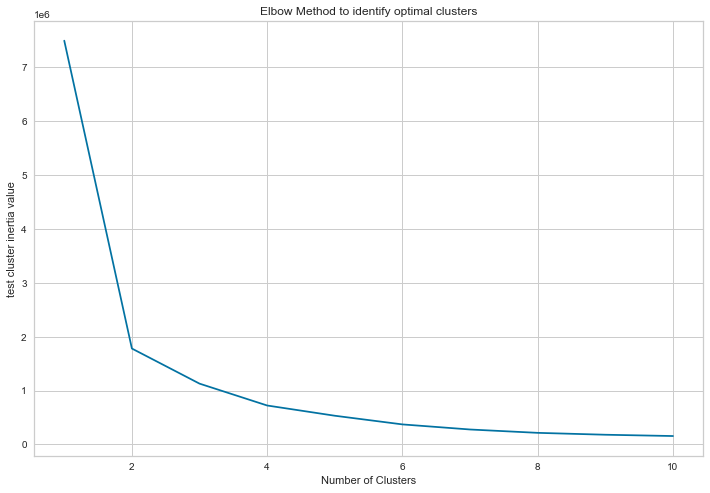

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),test)
plt.title('Elbow Method to identify optimal clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('test cluster inertia value')
plt.show()

#### Optimal Cluster size=2

In [ ]:
kmeans=KMeans(n_clusters=2,init='k-means++',n_init=10,random_state=23)
y_preds=kmeans.fit_transform(X_array)

In [ ]:
kmeans.cluster_centers_,kmeans

(array([[ 0.32790883,  0.31740374,  1.05191577, -0.33091028, 25.86906158],
        [ 0.37774524,  0.36934577,  1.08407182, -0.23063882, 52.49071434]]),
 KMeans(n_clusters=2, random_state=23))

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_array)
X["clusters"] = cluster_labels


In [ ]:
X=X.astype(int)

<AxesSubplot:xlabel='pc_1', ylabel='pc_2'>

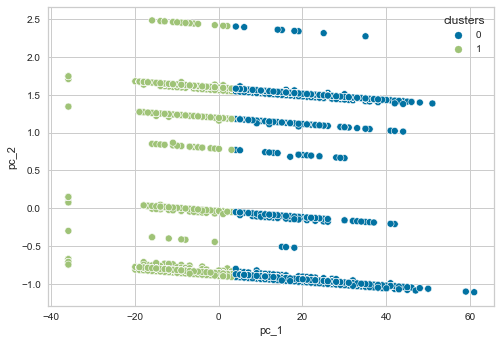

In [ ]:

# using PCA to reduce the dimensionality
pca = PCA(n_components=2, whiten=False, random_state=42)
X_pca_reduce = pca.fit_transform(X)
X_pca = pd.DataFrame(data=X_pca_reduce, columns=["pc_1", "pc_2"])
X_pca["clusters"] = cluster_labels

# plotting the clusters with seaborn
sns.scatterplot(x="pc_1", y="pc_2", hue="clusters", data=X_pca)

In [ ]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=23)
    kmeans.fit(X_array)
    test.append(kmeans.inertia_)

<AxesSubplot:xlabel='pc_1', ylabel='pc_2'>

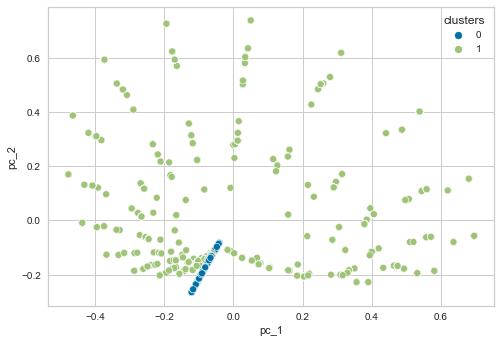

In [ ]:

# using PCA to reduce the dimensionality
pca = KernelPCA(n_components=2, kernel='rbf',random_state=42)
X_pca_reduce = pca.fit_transform(X)
X_pca = pd.DataFrame(data=X_pca_reduce, columns=["pc_1", "pc_2"])
X_pca["clusters"] = cluster_labels

# plotting the clusters with seaborn
sns.scatterplot(x="pc_1", y="pc_2", hue="clusters", data=X_pca)

<AxesSubplot:xlabel='pc_1', ylabel='pc_2'>

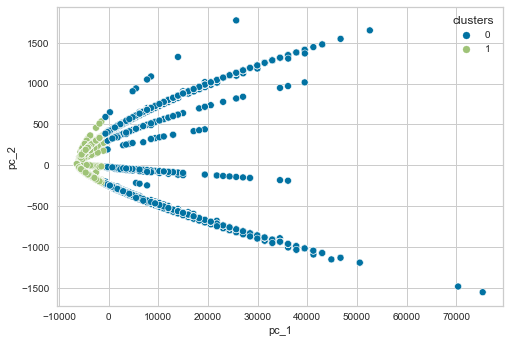

In [ ]:
# using PCA to reduce the dimensionality
pca = KernelPCA(n_components=2, kernel='poly',random_state=42)
X_pca_reduce = pca.fit_transform(X)
X_pca = pd.DataFrame(data=X_pca_reduce, columns=["pc_1", "pc_2"])
X_pca["clusters"] = cluster_labels

# plotting the clusters with seaborn
sns.scatterplot(x="pc_1", y="pc_2", hue="clusters", data=X_pca)

<AxesSubplot:xlabel='pc_1', ylabel='pc_2'>

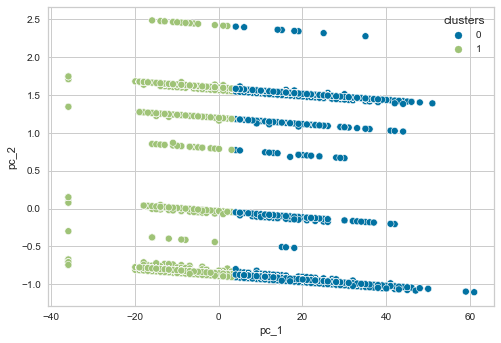

In [ ]:
# using PCA to reduce the dimensionality
pca = KernelPCA(n_components=2, kernel='linear',random_state=42)
X_pca_reduce = pca.fit_transform(X)
X_pca = pd.DataFrame(data=X_pca_reduce, columns=["pc_1", "pc_2"])
X_pca["clusters"] = cluster_labels

# plotting the clusters with seaborn
sns.scatterplot(x="pc_1", y="pc_2", hue="clusters", data=X_pca)

In [ ]:
transaction_subset_df

,t_dat,customer_id,article_id,price,sales_channel_id
0,9/20/2018,00b6ec8613e51d8eadc5157f5a12ae1366ca29da7d44cc...,529008008,0.013542,2
1,9/20/2018,00b6ec8613e51d8eadc5157f5a12ae1366ca29da7d44cc...,594633001,0.013542,2
2,9/20/2018,00b6ec8613e51d8eadc5157f5a12ae1366ca29da7d44cc...,603401002,0.013542,2
3,9/20/2018,00c59bdfaf753688c62cc13f67382dd54275f776a2f6a6...,678073001,0.024424,2
4,9/20/2018,00c59bdfaf753688c62cc13f67382dd54275f776a2f6a6...,671515001,0.024424,2
...,...,...,...,...,...
723984,9/22/2020,ffcba92c45455b22f54dd02303b057c0a4b9b1f4fcfdf2...,919273002,0.042356,2
723985,9/22/2020,ffcba92c45455b22f54dd02303b057c0a4b9b1f4fcfdf2...,881448002,0.059305,2
723986,9/22/2020,ffcba92c45455b22f54dd02303b057c0a4b9b1f4fcfdf2...,919273001,0.042356,2
723987,9/22/2020,ffcba92c45455b22f54dd02303b057c0a4b9b1f4fcfdf2...,919273004,0.042356,2


In [ ]:
transaction_subset_df.describe()

,article_id,price,sales_channel_id
count,7.239890e+05,723989.000000,723989.000000
mean,6.968440e+08,0.027671,1.685010
std,1.321115e+08,0.018859,0.464512
min,1.087750e+08,0.000271,1.000000
25%,6.331360e+08,0.015661,1.000000
50%,7.144210e+08,0.025407,2.000000
75%,7.863470e+08,0.033881,2.000000
max,9.537630e+08,0.456102,2.000000


In [ ]:
transaction_subset_df['t_dat'].agg(['min', 'max'])

min    1/1/2019
max    9/9/2020
Name: t_dat, dtype: object

In [ ]:
transaction_subset_df[["t_dat"]] = transaction_subset_df[["t_dat"]].apply(pd.to_datetime)

In [ ]:
transaction_subset_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,00b6ec8613e51d8eadc5157f5a12ae1366ca29da7d44cc...,529008008,0.013542,2
1,2018-09-20,00b6ec8613e51d8eadc5157f5a12ae1366ca29da7d44cc...,594633001,0.013542,2
2,2018-09-20,00b6ec8613e51d8eadc5157f5a12ae1366ca29da7d44cc...,603401002,0.013542,2
3,2018-09-20,00c59bdfaf753688c62cc13f67382dd54275f776a2f6a6...,678073001,0.024424,2
4,2018-09-20,00c59bdfaf753688c62cc13f67382dd54275f776a2f6a6...,671515001,0.024424,2


In [ ]:
transaction_time_series=transaction_subset_df

In [ ]:
transaction_time_series.groupby(by="t_dat")["price"].sum()

t_dat
2018-09-20    32.207424
2018-09-21    31.312017
2018-09-22    11.492814
2018-09-23    34.262763
2018-09-24    27.613525
                ...    
2020-09-18    35.924271
2020-09-19    27.141966
2020-09-20    24.529491
2020-09-21    21.964169
2020-09-22    21.655678
Name: price, Length: 734, dtype: float64

In [ ]:
transaction_time_series.groupby(by="t_dat")["customer_id"].count()

t_dat
2018-09-20    1092
2018-09-21    1051
2018-09-22     393
2018-09-23    1153
2018-09-24     984
              ... 
2020-09-18    1077
2020-09-19     845
2020-09-20     752
2020-09-21     657
2020-09-22     646
Name: customer_id, Length: 734, dtype: int64

In [ ]:
date_unique=pd.DataFrame()
date_unique['date']=transaction_time_series.t_dat.unique()

In [ ]:
date_unique['total_sales']=transaction_time_series.groupby(by="t_dat")["price"].sum().values
date_unique['customers_count']=transaction_time_series.groupby(by="t_dat")["customer_id"].count().values
date_unique['articles_count']=transaction_time_series.groupby(by="t_dat")["article_id"].count().values

In [ ]:
date_unique.head()

,date,total_sales,customers_count,articles_count
0,2018-09-20,32.207424,1092,1092
1,2018-09-21,31.312017,1051,1051
2,2018-09-22,11.492814,393,393
3,2018-09-23,34.262763,1153,1153
4,2018-09-24,27.613525,984,984


In [ ]:
date_unique.describe()

,total_sales,customers_count,articles_count
count,734.000000,734.000000,734.000000
mean,27.293273,986.361035,986.361035
std,9.771178,392.531507,392.531507
min,6.304136,194.000000,194.000000
25%,21.717153,757.250000,757.250000
50%,25.629890,902.000000,902.000000
75%,29.953102,1097.500000,1097.500000
max,129.280814,4288.000000,4288.000000


<AxesSubplot:xlabel='date', ylabel='total_sales'>

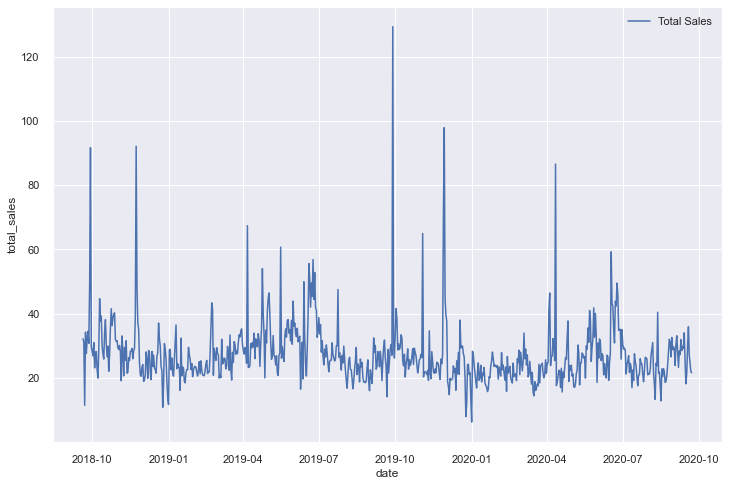

In [ ]:
# plt.plot(data=date_unique,x='date',y='total_sales')
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x = "date", y = "total_sales", data = date_unique,label = 'Total Sales')

<AxesSubplot:xlabel='date', ylabel='customers_count'>

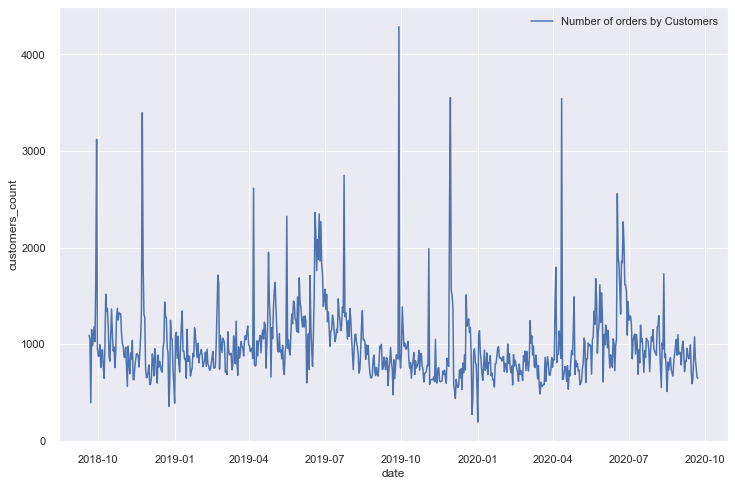

In [ ]:
sns.lineplot(x = "date", y = "customers_count", data = date_unique,label = 'Number of orders by Customers')

In [ ]:
date_unique[ '7day_rolling_avg' ] = date_unique.total_sales.rolling( 7).mean()

In [ ]:
date_unique

,date,total_sales,customers_count,articles_count,7day_rolling_avg
0,2018-09-20,32.207424,1092,1092,NaN
1,2018-09-21,31.312017,1051,1051,NaN
2,2018-09-22,11.492814,393,393,NaN
3,2018-09-23,34.262763,1153,1153,NaN
4,2018-09-24,27.613525,984,984,NaN
...,...,...,...,...,...
729,2020-09-18,35.924271,1077,1077,27.658656
730,2020-09-19,27.141966,845,845,27.365864
731,2020-09-20,24.529491,752,752,26.006995
732,2020-09-21,21.964169,657,657,25.585574


<AxesSubplot:xlabel='date', ylabel='total_sales'>

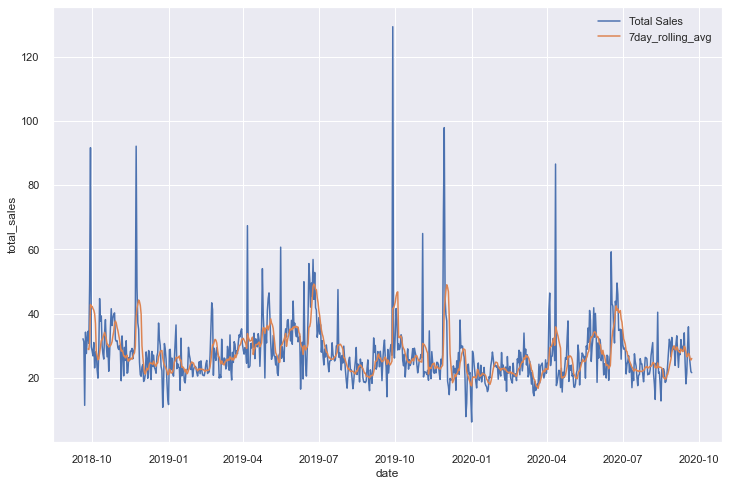

In [ ]:
sns.lineplot(x = "date", y = "total_sales", data = date_unique,label = 'Total Sales')
sns.lineplot(x = "date", y = "7day_rolling_avg", data = date_unique,label = '7day_rolling_avg')

In [ ]:
date_unique['day']=date_unique.date.dt.day
date_unique['month']=date_unique.date.dt.month
date_unique['week_day']=date_unique.date.dt.weekday

In [ ]:
date_unique

,date,total_sales,customers_count,articles_count,7day_rolling_avg,day,month,week_day
0,2018-09-20,32.207424,1092,1092,NaN,20,9,3
1,2018-09-21,31.312017,1051,1051,NaN,21,9,4
2,2018-09-22,11.492814,393,393,NaN,22,9,5
3,2018-09-23,34.262763,1153,1153,NaN,23,9,6
4,2018-09-24,27.613525,984,984,NaN,24,9,0
...,...,...,...,...,...,...,...,...
729,2020-09-18,35.924271,1077,1077,27.658656,18,9,4
730,2020-09-19,27.141966,845,845,27.365864,19,9,5
731,2020-09-20,24.529491,752,752,26.006995,20,9,6
732,2020-09-21,21.964169,657,657,25.585574,21,9,0


C:\Users\HARSHA\AppData\Local\Temp\ipykernel_13728\266962879.py:1: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  date_unique = date_unique.set_index('date').resample('1H').pad()


<AxesSubplot:xlabel='date'>

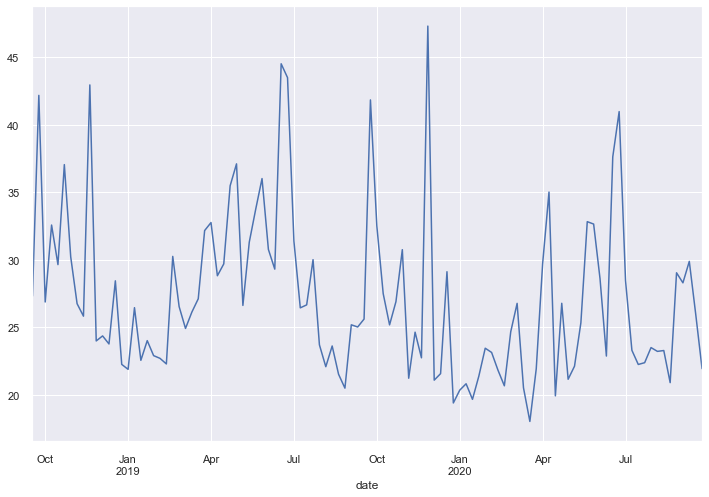

In [ ]:
date_unique = date_unique.set_index('date').resample('1H').pad()
date_unique['total_sales'].resample('W').mean().plot()

<AxesSubplot:xlabel='date'>

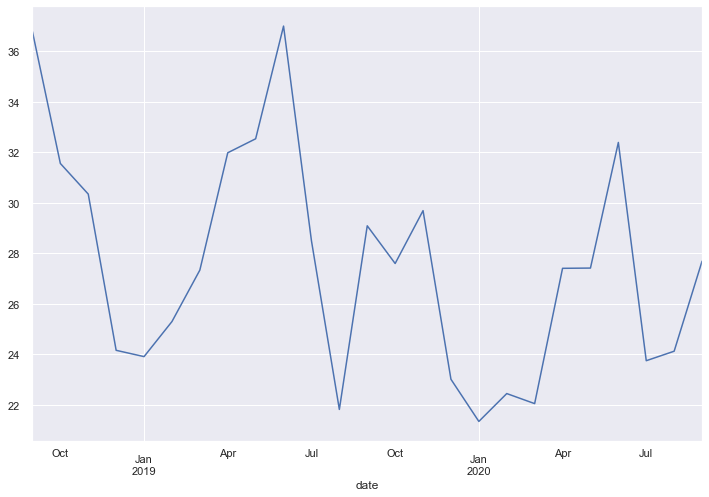

In [ ]:
date_unique['total_sales'].resample('M').mean().plot()

In [ ]:
date_unique

,total_sales,customers_count,articles_count,7day_rolling_avg,day,month,week_day
date,,,,,,,
2018-09-20 00:00:00,32.207424,1092,1092,NaN,20,9,3
2018-09-20 01:00:00,32.207424,1092,1092,NaN,20,9,3
2018-09-20 02:00:00,32.207424,1092,1092,NaN,20,9,3
2018-09-20 03:00:00,32.207424,1092,1092,NaN,20,9,3
2018-09-20 04:00:00,32.207424,1092,1092,NaN,20,9,3
...,...,...,...,...,...,...,...
2020-09-21 20:00:00,21.964169,657,657,25.585574,21,9,0
2020-09-21 21:00:00,21.964169,657,657,25.585574,21,9,0
2020-09-21 22:00:00,21.964169,657,657,25.585574,21,9,0



Note: you may need to restart the kernel to use updated packages.
